## Explain of ICA

This week, let's talk about the [Independent Component Analysis (ICA)](https://en.wikipedia.org/wiki/Independent_component_analysis), which is a method that could separate the mixture of the signals back to the sources. Let's first see an example here:

The most famous example is the (cocktail party effect)[https://en.wikipedia.org/wiki/Cocktail_party_effect]: imagine a very simple case, that you are in a cocktail party that have 4 people, you, and A, B, C. You are talking with person A, and person B and C are in another conversation. Therefore, there are two converstations going on at the same time independently. Now, let's say, one converstation is signal 1 - s1 and the other one is signal 2 - s2. If we have two recorders near us at different place, they will record the two conversations that mixed together. Say r1 and r2 are the recorded converstations, they are from different mixing of the two signals s1, s2. As sounds can be sumed linearly, therefore, r1 = a1 \* s1 + b1 \* s2, and r2 = a2 \* s1 + b2 \* s2. Now, from our recorded two signals, r1 and r2, is there a way we could find out the source s1 and s2? 

This is where ICA comes in, it is a method that could help us to find the two signal sources from the mixed recordings. It is really useful, and belong to a larger area called [blind signal separation](https://en.wikipedia.org/wiki/Blind_signal_separation). 

### Example below

Let's generate two signals and see if we could separate them. We use two different sources, one is a sine wave, and the other one is just a square wave. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

In [20]:
t = np.arange(0, 10, 0.1)

s1 = np.sin(2*t + 3)

s2 = np.sign(np.sin(3 * t)) 

Let's plot the two sources:

Text(0,0.5,'Amplitude')

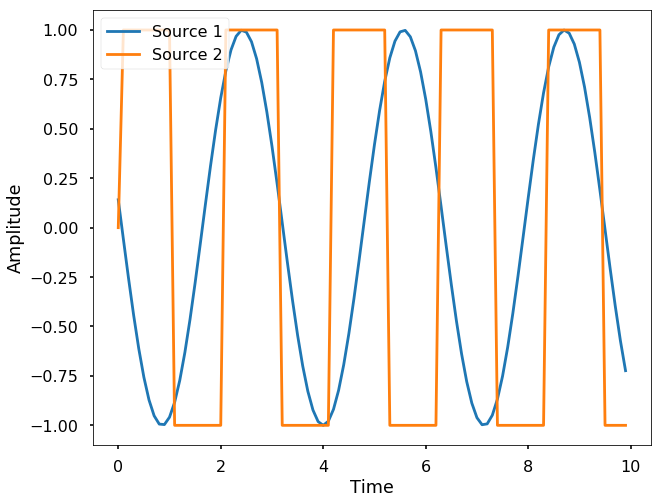

In [21]:
plt.figure(figsize = (10, 8))
plt.plot(t, s1, label = 'Source 1')
plt.plot(t, s2, label = 'Source 2')
plt.legend(loc = 2)
plt.xlabel('Time')
plt.ylabel('Amplitude')

Now let's assume that we have two recorders that recorded the mixture of the two sources, but they emphasize the two  sources differently (plus, we add in some white noise as well). 

In [22]:
r1 = 2*s1 + 3*s2 + 0.05* np.random.normal(size=len(t))
r2 = 0.5*s1 + 2*s2 + 0.05 * np.random.normal(size=len(t))

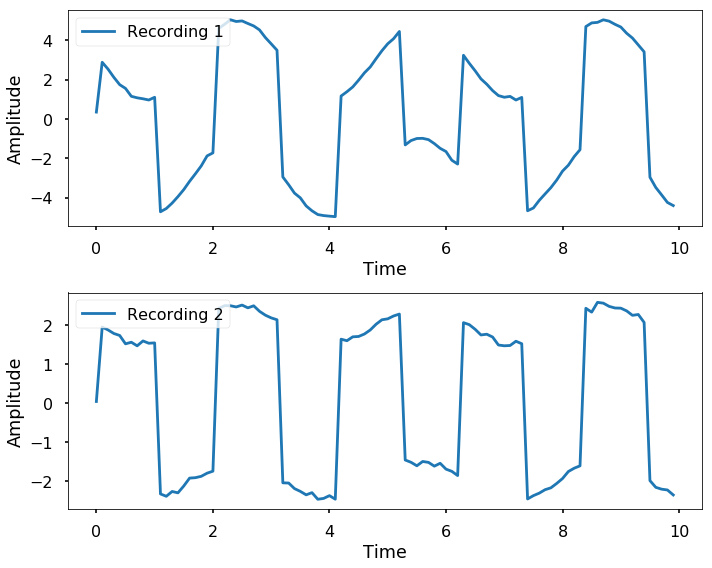

In [23]:
plt.figure(figsize = (10, 8))
plt.subplot(211)
plt.plot(t, r1, label = 'Recording 1')
plt.legend(loc = 2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(t, r2, label = 'Recording 2')
plt.legend(loc = 2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()

Now let's try to use ICA to separate the two signals. 

In [24]:
from sklearn.decomposition import FastICA

In [28]:
S = np.c_[r1, r2]
S /= S.std(axis=0) 

In [29]:
# Compute ICA
ica = FastICA(n_components = 2, random_state=2)
signal_ica = ica.fit_transform(S)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
print(A_)

[[4.41784919 8.97120998]
 [1.98294353 9.80142515]]


Text(0,0.5,'Amplitude')

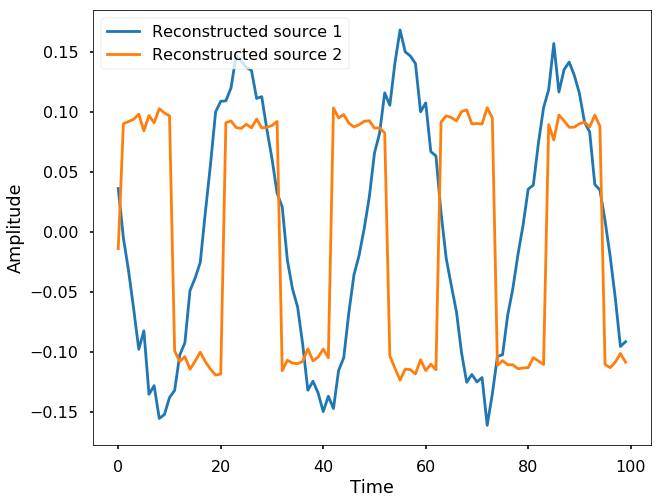

In [30]:
plt.figure(figsize = (10, 8))
l = plt.plot(signal_ica)
plt.legend(iter(l), ('Reconstructed source 1', 'Reconstructed source 2'), loc = 2)
plt.xlabel('Time')
plt.ylabel('Amplitude')